# Predicting FIFA World Cup 2022

## Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

## Reading the database

using database "international_matches.csv" from:  https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022/code That has the fifa rank scores 

and

the databe "players_22.csv" from: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset  That has the the players data for the Career Mode from FIFA 15 to FIFA 22

international_matches

In [41]:
df = pd.read_csv('data/international_matches.csv', parse_dates=['date'])
df['date'] = pd.to_datetime(df['date'])
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


players_22

In [44]:
players_22_df = pd.read_csv('data/players_22.csv')
players_22_df.tail()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19238,264540,https://sofifa.com/player/264540/emanuel-lalch...,E. Lalchhanchhuaha,Emanuel Lalchhanchhuaha,CAM,47,60,110000.0,500.0,19,...,41+2,41+2,41+2,45+2,16+2,https://cdn.sofifa.net/players/264/540/22_120.png,https://cdn.sofifa.net/teams/113040/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png


Deleting non-relevant data

In [46]:
useless_columns = ['sofifa_id','player_url','long_name','dob','club_loaned_from','nation_position','nation_jersey_number','body_type','real_face','player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url','goalkeeping_speed','player_tags','nation_team_id']
players_22_df = players_22_df.drop(useless_columns, axis=1)
print(players_22_df.columns)

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_joined', 'club_contract_valid_until',
       'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate',
       'release_clause_eur', 'player_traits', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
      

Checking for null values in columns that are important to analysis.

In [48]:
columns = ['dribbling','defending','physic','passing','shooting','pace']
players_22_df[columns].isnull().sum()

dribbling    2132
defending    2132
physic       2132
passing      2132
shooting     2132
pace         2132
dtype: int64

Creating new columns from player position to get all type of position a player plays.

In [52]:
new_player_position = players_22_df['player_positions'].str.get_dummies(sep=',').add_prefix('Position')
new_player_position.head()
players_22_df = pd.concat([players_22_df,new_player_position],axis=1)
players_22_df = players_22_df.drop('player_positions',axis=1)

In [55]:
columns1 = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
players_22_df[columns1].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+3,89+3,89+3,92,93,93,93,92,93,93,...,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3
1,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,...,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3
2,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,...,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3
3,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,...,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3
4,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,...,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3


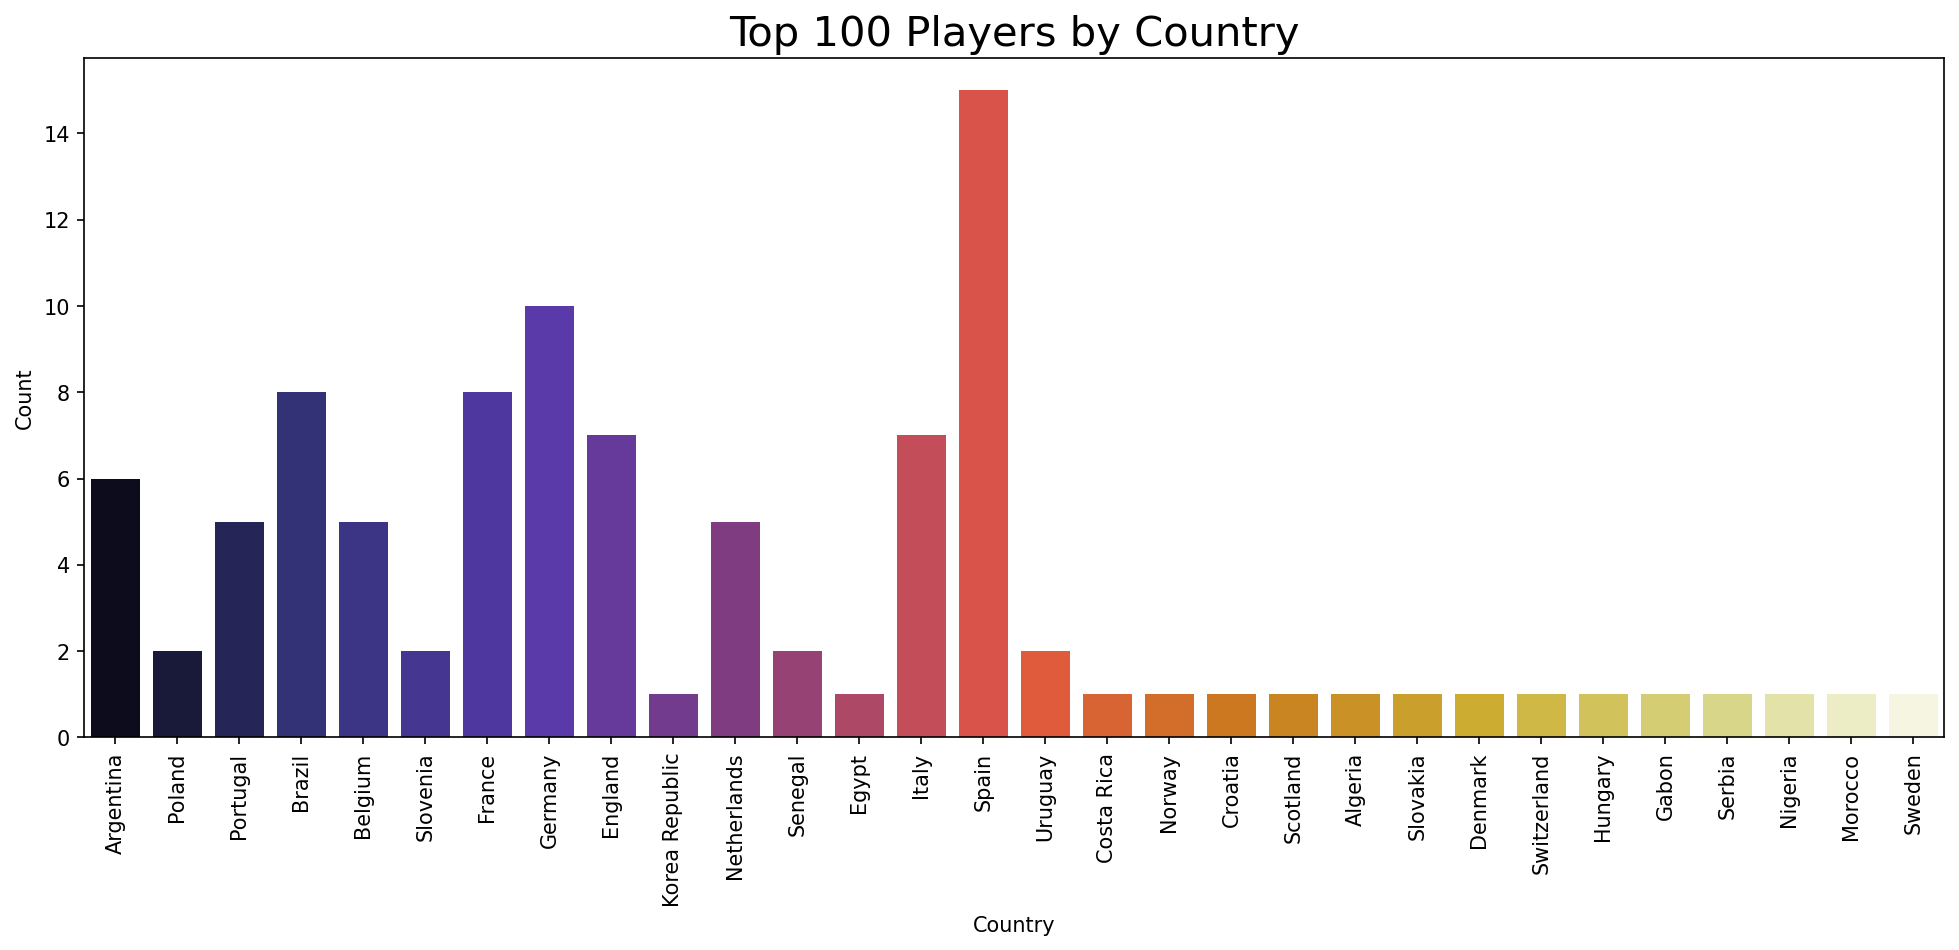

In [58]:
plt.figure(figsize=(16,6),dpi=150)
sns.countplot(x='nationality_name', data=players_22_df.head(100),palette='CMRmap')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 100 Players by Country', fontsize=20)
plt.show()

In [45]:
players_22_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [39]:
#let's re-shape the data a bit
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
'away_team_total_fifa_points','home_team_total_fifa_points']]
home = fifa_rank[['date', 'home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank','home_team_total_fifa_points' : 'rank_points' })
away = fifa_rank[['date', 'away_team','away_team_fifa_rank','away_team_total_fifa_points']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank','away_team_total_fifa_points' : 'rank_points' })
fifa_rank = home.append(away)

#select for each country the latest match
fifa_rank  = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'rank')
#fifa_points_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nlargest(10, 'rank_points') 

#let's see the 5 strongest teams
fifa_rank_top

,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


In [12]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [17]:
df[['home_team','away_team','home_team_fifa_rank','away_team_fifa_rank']]

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank
0,Bolivia,Uruguay,59,22
1,Brazil,Mexico,8,14
2,Ecuador,Venezuela,35,94
3,Guinea,Sierra Leone,65,86
4,Paraguay,Argentina,67,5
...,...,...,...,...
23916,Moldova,Andorra,180,153
23917,Liechtenstein,Latvia,192,135
23918,Chile,Ghana,28,60
23919,Japan,Tunisia,23,35


In [37]:
df[(df['home_team']=='Belgium')].loc[:,['date','home_team','rank_points']].tail()

KeyError: "['rank_points'] not in index"

In [9]:
df2 = pd.read_csv('WorldCup2022/datasets/fifa_ranking_before_wc.csv')
df2.head()

,WorldCup,RK,Team,PTS
0,1994,1,GermanyGER,60.0
1,1994,2,NetherlandsNED,59.0
2,1994,3,BrazilBRA,59.0
3,1994,4,ItalyITA,57.0
4,1994,5,SpainESP,56.0


In [10]:
df2 = pd.read_csv('WorldCup2022/datasets/elo_rating.csv')
df2.head()

,Year,RK,Team,Rating,AverageRank,AverageRating,YearRank,YearRating,MatchesTotal,MathcesHome,MatchesAway,MatchesNeutral,MatchesWins,MatchesLosses,MatchesDraws,GoalsFor,GoalsAgainst
0,1993,1,Germany,2015,9,1883,+2,+21,612,269,261,82,343,145,124,1378,786
1,1993,2,Italy,2000,8,1901,+2,+20,507,246,192,69,270,107,130,942,557
2,1993,3,Netherlands,1995,18,1798,+2,+27,512,246,219,47,238,170,104,1075,802
3,1993,4,Brazil,1950,5,1975,−2,−49,590,244,192,154,359,108,123,1270,608
4,1993,5,Yugoslavia,1933,19,1775,+2,0,523,192,253,78,252,169,102,1097,816
